# Comparison of Clustering Algorithms

Data Pre-Processing

In [1]:
# Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
import hdbscan
import time

In [2]:
def colormap(labels, method):
    """ Produces colormap of material segmented by cluster """

    labels = labels.reshape(69, 100)
    colors = 'lime red'.split()
    cmap = matplotlib.colors.ListedColormap(colors, name='colors', N=None)

    plt.imshow(labels, cmap=cmap)
    plt.axis('off')
    plt.title(method)
    plt.show()

In [3]:
# Quantified chemistry of materials through raster imaging
ni_wt = pd.read_csv('Ni_Wt_pct.csv', header = None).dropna(axis = 1).to_numpy()
ni_at = pd.read_csv('Ni At.csv', header = None).dropna(axis = 1).to_numpy()
al_wt = pd.read_csv('Al_Wt_pct.csv', header = None).dropna(axis = 1).to_numpy()
al_at = pd.read_csv('Al At.csv', header = None).dropna(axis = 1).to_numpy()

In [4]:
# Combine dataframes into an array with a value of each for each pixel
wt_at = []
for i in range(len(ni_at)):
    concat = np.concatenate([ni_wt[i][:,None], ni_at[i][:,None], al_wt[i][:,None], 
                             al_at[i][:,None]], axis = 1)
    wt_at.append(concat)

In [5]:
# Convert to 2-D array for clustering
wt_at = np.array(wt_at)

length = wt_at.shape[0]
width = wt_at.shape[1]
dims_both = wt_at.shape[2]

wt_at = wt_at.reshape(length * width, dims_both)
wt_at.shape

(6900, 4)

In [20]:
methods = ['K-Means','Spectral Clustering', 'DBSCAN', 'HDBSCAN']
times = pd.DataFrame(columns = methods)

In [21]:
# Parameters for DBSCAN
eps = 0.10123208285914496
min_samples = 20

for i in range(10):
    
    row = dict.fromkeys(['K-Means','Spectral Clustering', 'DBSCAN', 'HDBSCAN'])
    
    start_time = time.time()
    KMeans(n_clusters = 2).fit(wt_at)
    end_time = time.time()
    row['K-Means'] = end_time - start_time
    
    start_time = time.time()
    SpectralClustering(n_clusters = 2, assign_labels='discretize').fit(wt_at)
    end_time = time.time()
    row['Spectral Clustering'] = end_time - start_time
    
    start_time = time.time()
    clusters = DBSCAN(eps = eps, min_samples = min_samples).fit(wt_at)
    end_time = time.time()
    row['DBSCAN'] = end_time - start_time
    
    start_time = time.time()
    hdbscan.HDBSCAN(min_cluster_size=20).fit_predict(wt_at)
    end_time = time.time()
    row['HDBSCAN'] = end_time - start_time
    
    times = times.append(row, ignore_index=True)

In [25]:
times

,K-Means,Spectral Clustering,DBSCAN,HDBSCAN
0,0.264087,16.648862,0.080520,0.117738
1,0.308784,12.810223,0.087717,0.127308
2,0.093524,8.777022,0.082806,0.123263
3,0.093295,9.026856,0.088324,0.115889
4,0.099703,9.019300,0.084388,0.114184
5,0.085275,8.700362,0.081725,0.115255
6,0.093353,8.654968,0.079735,0.113173
7,0.095550,8.565844,0.081886,0.117974
8,0.090697,8.833129,0.083175,0.115441
9,0.092301,8.560947,0.076398,0.117084


In [26]:
mean_times = [np.mean(times['K-Means']), np.mean(times['Spectral Clustering']), np.mean(times['DBSCAN']), np.mean(times['HDBSCAN'])]
mean_times

[0.13165688514709473,
 9.959751296043397,
 0.08266739845275879,
 0.11773087978363037]

Text(0, 0.5, 'Seconds')

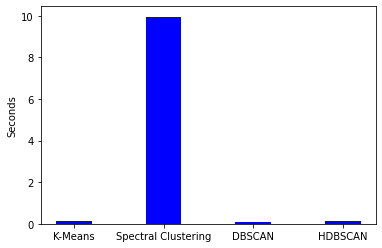

In [29]:
plt.bar(methods, mean_times, color ='blue', width = 0.4)
plt.ylabel('Seconds')

In [12]:
clusters = KMeans(n_clusters = 2).fit(wt_at)

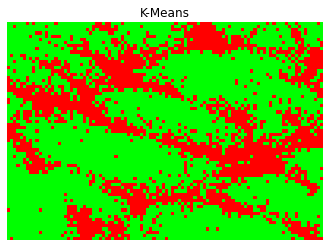

In [13]:
colormap(clusters.labels_, 'K-Means')

In [14]:
clusters = SpectralClustering(n_clusters = 2, assign_labels='discretize').fit(wt_at)

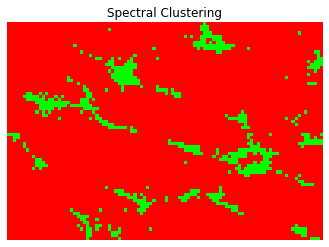

In [15]:
colormap(clusters.labels_, 'Spectral Clustering')

In [16]:
# Predetermined for decent accuracy
eps = 0.10123208285914496 
min_samples = 20

clusters = DBSCAN(eps = eps, min_samples = 20).fit(wt_at)

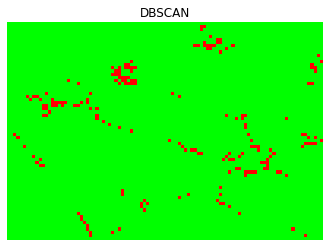

In [17]:
colormap(clusters.labels_, 'DBSCAN')

In [18]:
labels = hdbscan.HDBSCAN(min_cluster_size=20).fit_predict(wt_at)

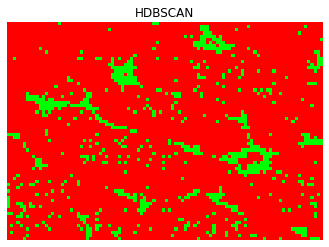

In [19]:
colormap(labels, 'HDBSCAN')